<a href="https://colab.research.google.com/github/Mint0511/PTDL-25-26/blob/minh/DA06%20/%202_1_2_Default_of_credit_card_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài toán dự đoán khả năng vỡ nợ của khách hàng thẻ tín dụng**

## Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

Bước 1: Tải package liên quan và package graphviz để vẽ cây quyết định

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

Bước 2: Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết

In [2]:
df = pd.read_csv('default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Bước 3: Chuẩn bị dữ liệu cho tập train và tập test

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

Bước 4: Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [5]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Bước 5: Hiển thị cây quyết định với package graphviz

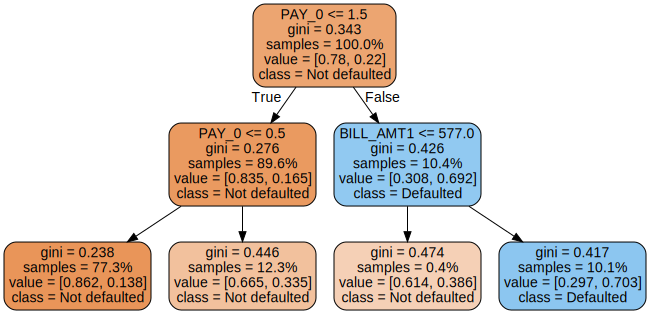

In [6]:
dot_data = tree.export_graphviz(dt,
out_file=None,
filled=True,
rounded=True,
feature_names=\
features_response[:-1],
proportion=True,
class_names=['Not defaulted', 'Defaulted'])
graph = graphviz.Source(dot_data)
graph

## Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

Bước 1: Tải package liên quan và package graphviz để vẽ cây quyết định

In [ ]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

Bước 2: Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết

In [ ]:
df = pd.read_csv('default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Bước 3: Chuẩn bị dữ liệu cho tập train và tập test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

Bước 4: Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu

In [7]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

## Giải thích các tham số trong đánh giá mô hình

### 1. `scoring = 'roc_auc'`
- **Ý nghĩa:** Dùng **ROC AUC** (Area Under the Receiver Operating Characteristic Curve) làm **thước đo hiệu suất mô hình**.  
- ROC AUC đo **khả năng mô hình phân biệt giữa hai lớp (positive/negative)**.  
- **Giá trị:**
  - `AUC = 1.0`: mô hình hoàn hảo  
  - `AUC = 0.5`: mô hình dự đoán ngẫu nhiên  
  - `AUC < 0.5`: mô hình dự đoán ngược  
- **Ưu điểm:**
  - Không phụ thuộc ngưỡng phân loại (ví dụ 0.5).  
  - Cân bằng giữa **True Positive Rate (TPR)** và **False Positive Rate (FPR)**.  
  - Phù hợp khi dữ liệu **mất cân bằng (imbalanced data)**.

---

### 2. `cv = 4`
- **Ý nghĩa:** Sử dụng **4-fold cross-validation** (chia dữ liệu thành 4 phần).  
- Cách hoạt động:
  - Chia dữ liệu thành 4 phần (folds).  
  - Mỗi lần, dùng 3 phần để **huấn luyện (train)** và 1 phần để **kiểm tra (test)**.  
  - Lặp lại 4 lần sao cho mỗi phần đều được dùng làm test một lần.  
- **Mục đích:**  
  - Giúp đánh giá mô hình **ổn định và khách quan hơn**.  
  - Giảm ảnh hưởng của việc chia train/test ngẫu nhiên.

---

### 3. `return_train_score = True`
- **Ý nghĩa:** Yêu cầu hàm đánh giá (ví dụ `GridSearchCV` hoặc `cross_validate`) **trả về cả điểm trên tập huấn luyện (train)**.  
- Mặc định (`False`), chỉ trả về điểm test.  
- Khi đặt `True`, giúp ta **so sánh train score và test score** → đánh giá được **bias – variance**.

| Tình huống | Train score | Test score | Kết luận |
|-------------|-------------|-------------|-----------|
| Cao | Thấp | **Overfitting (quá khớp)** |
| Thấp | Gần bằng train | **Underfitting (thiếu khớp)** |
| Cao và gần bằng nhau | — | **Tốt (cân bằng bias-variance)** |

---

### Ví dụ minh họa

```python
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Tạo dữ liệu mẫu
X, y = make_classification(random_state=42)

# Mô hình ví dụ
model = RandomForestClassifier()

# Đánh giá bằng cross-validation
result = cross_validate(
    model,
    X, y,
    cv=4,
    scoring='roc_auc',
    return_train_score=True
)

print("Train AUC:", result['train_score'])
print("Test AUC:", result['test_score'])


Bước 5: Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1478637665.py:8: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE training scores')
/tmp/ipython-input-1478637665.py:12: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE testing scores')


Text(0, 0.5, 'ROC AUC')

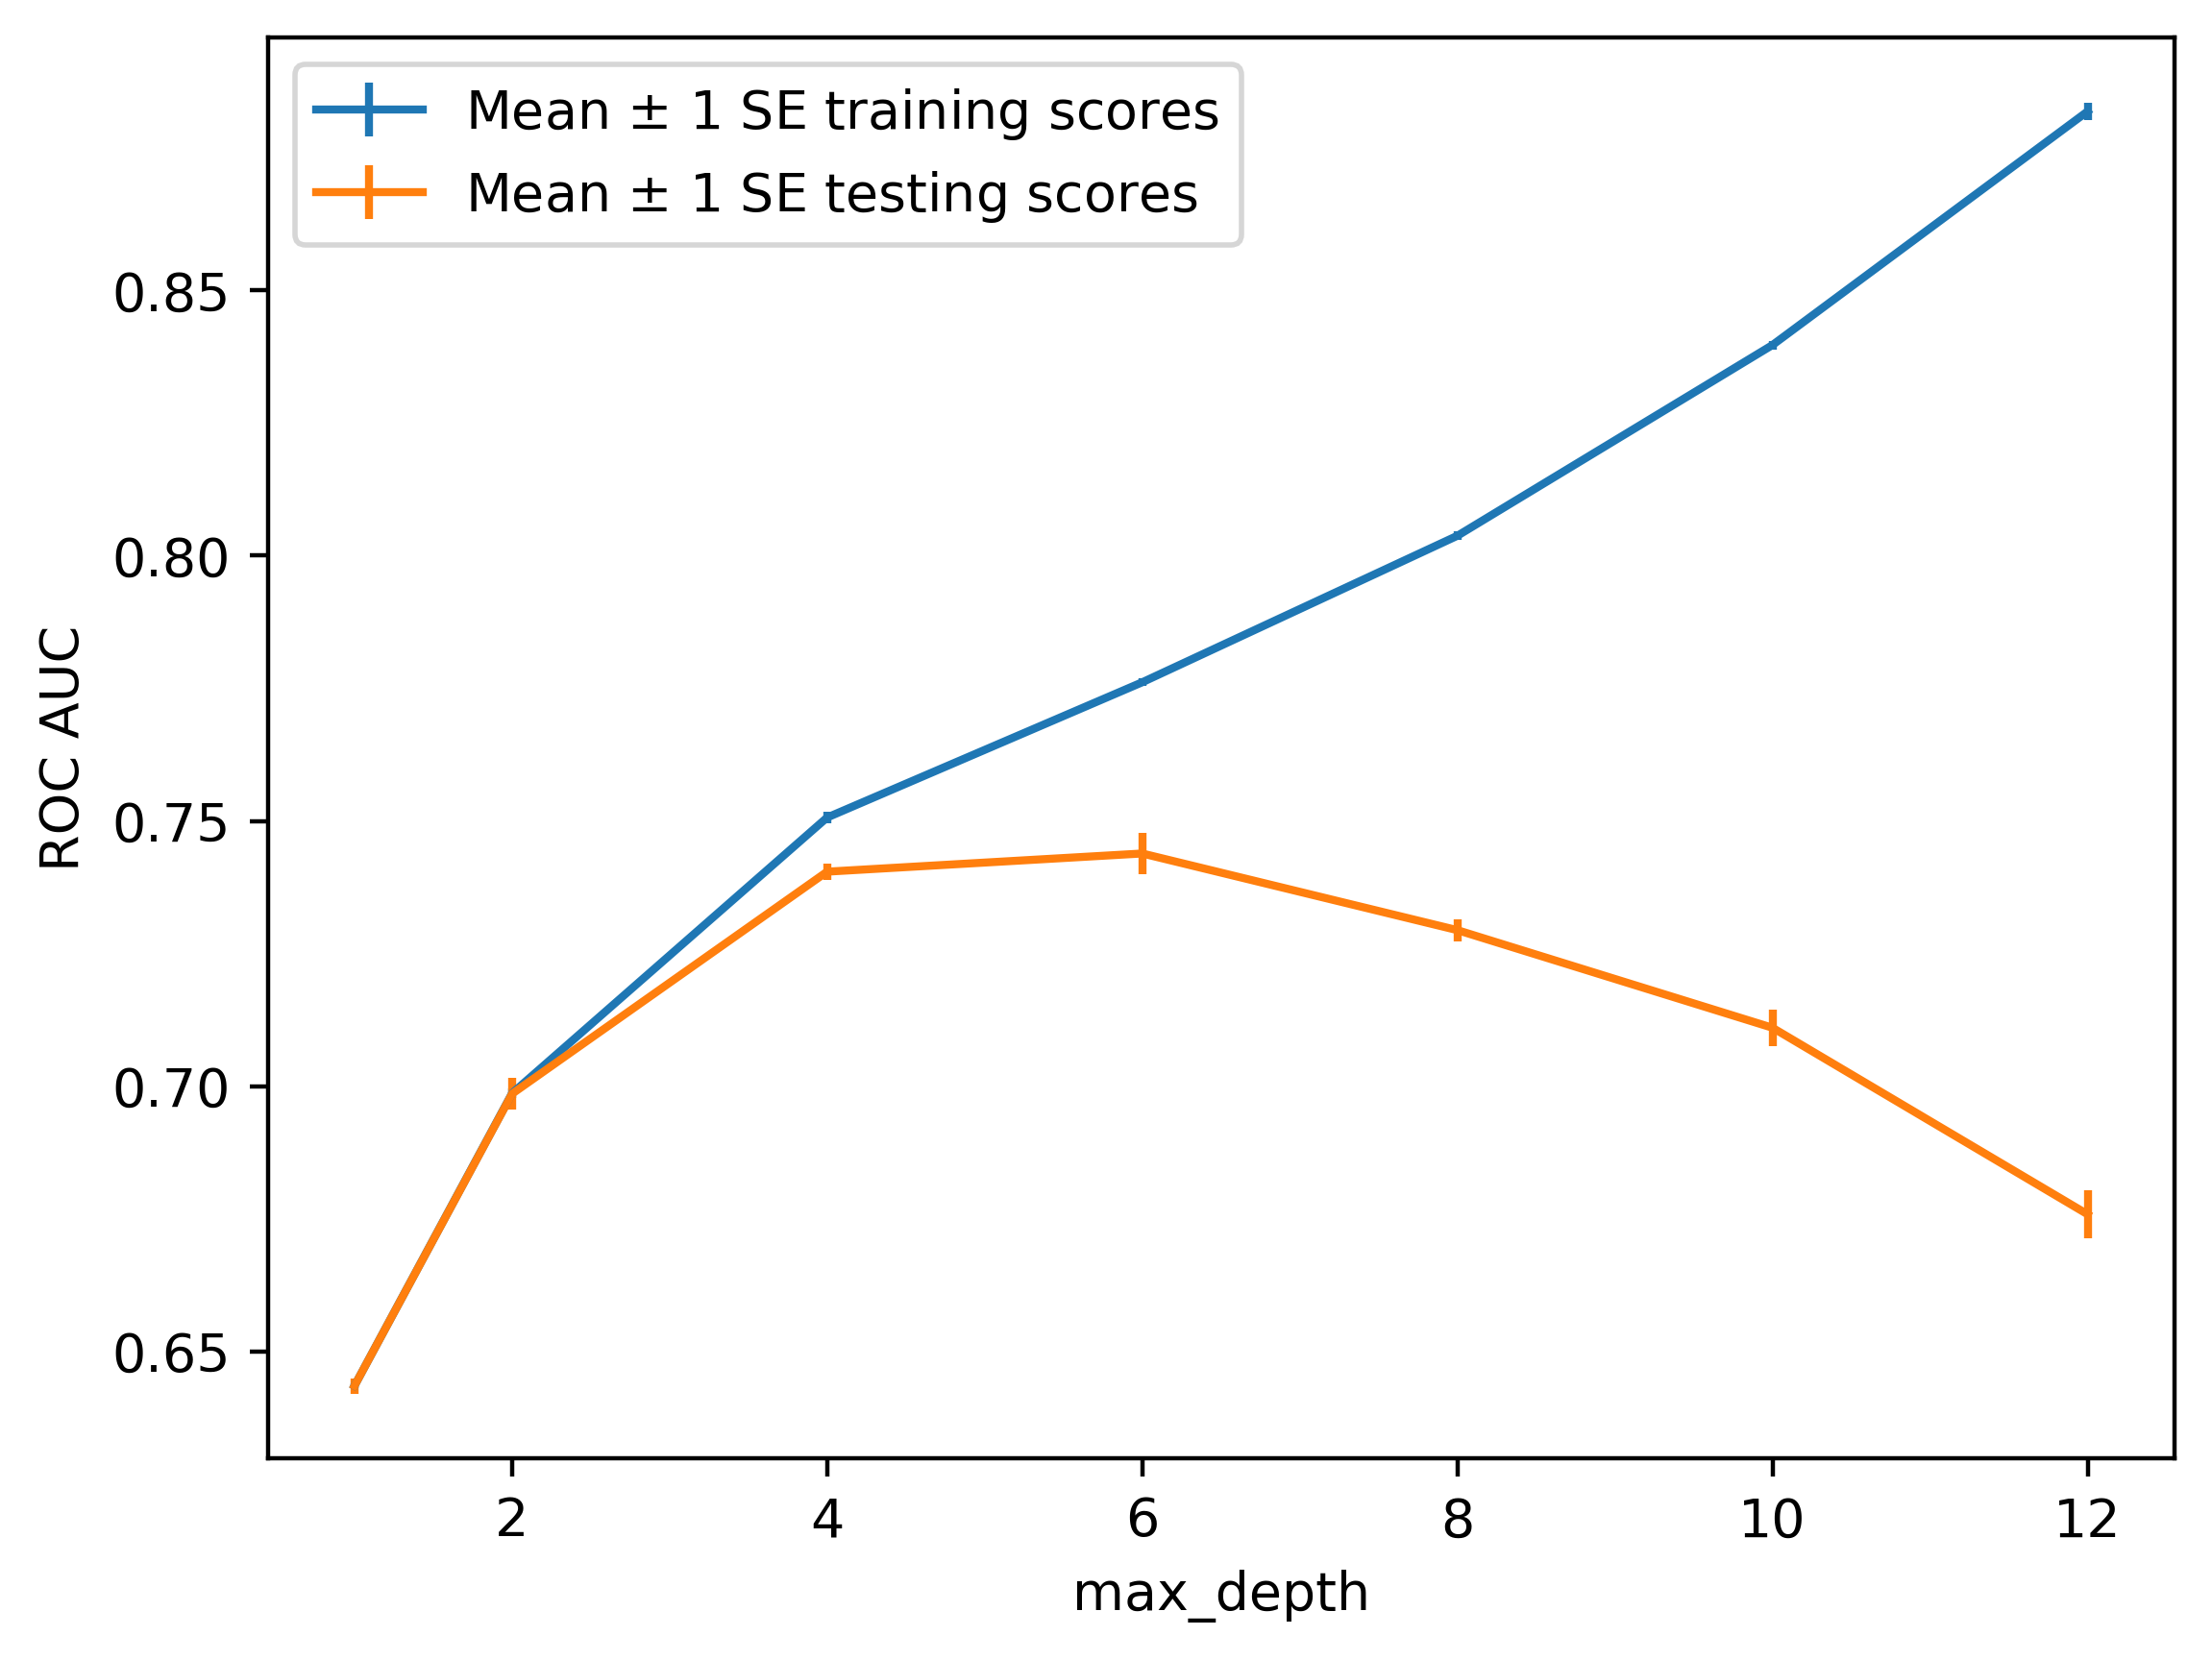

In [8]:
cv_results_df = pd.DataFrame(cv.cv_results_)
#View the names of the remaining columns in the results DataFrame
cv_results_df.columns
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_train_score'],
yerr=cv_results_df['std_train_score']/np.sqrt(4),
label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
cv_results_df['mean_test_score'],
yerr=cv_results_df['std_test_score']/np.sqrt(4),
label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

## Nhiệm vụ 3: Xây dựng rừng cây (random forest)

Bước 1: Tải package liên quan và package graphviz để vẽ cây quyết định

In [ ]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

Bước 2: Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết

In [ ]:
df = pd.read_csv('default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Bước 3: Chuẩn bị dữ liệu cho tập train và tập test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
#Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
df['default payment next month'].values,
test_size=0.2, random_state=24)

Bước 4: Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
(n_estimators=10, criterion='gini', max_depth=3,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=0, warm_start=False, class_weight=None)

Bước 5: Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [16]:
#a parameter grid for this exercise in order to search the numbers of trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators':list(range(10,110,10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc', n_jobs=None, refit=True, cv=4, verbose=1, error_score= np.nan, return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

Bước 6: Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1889697650.py:12: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')


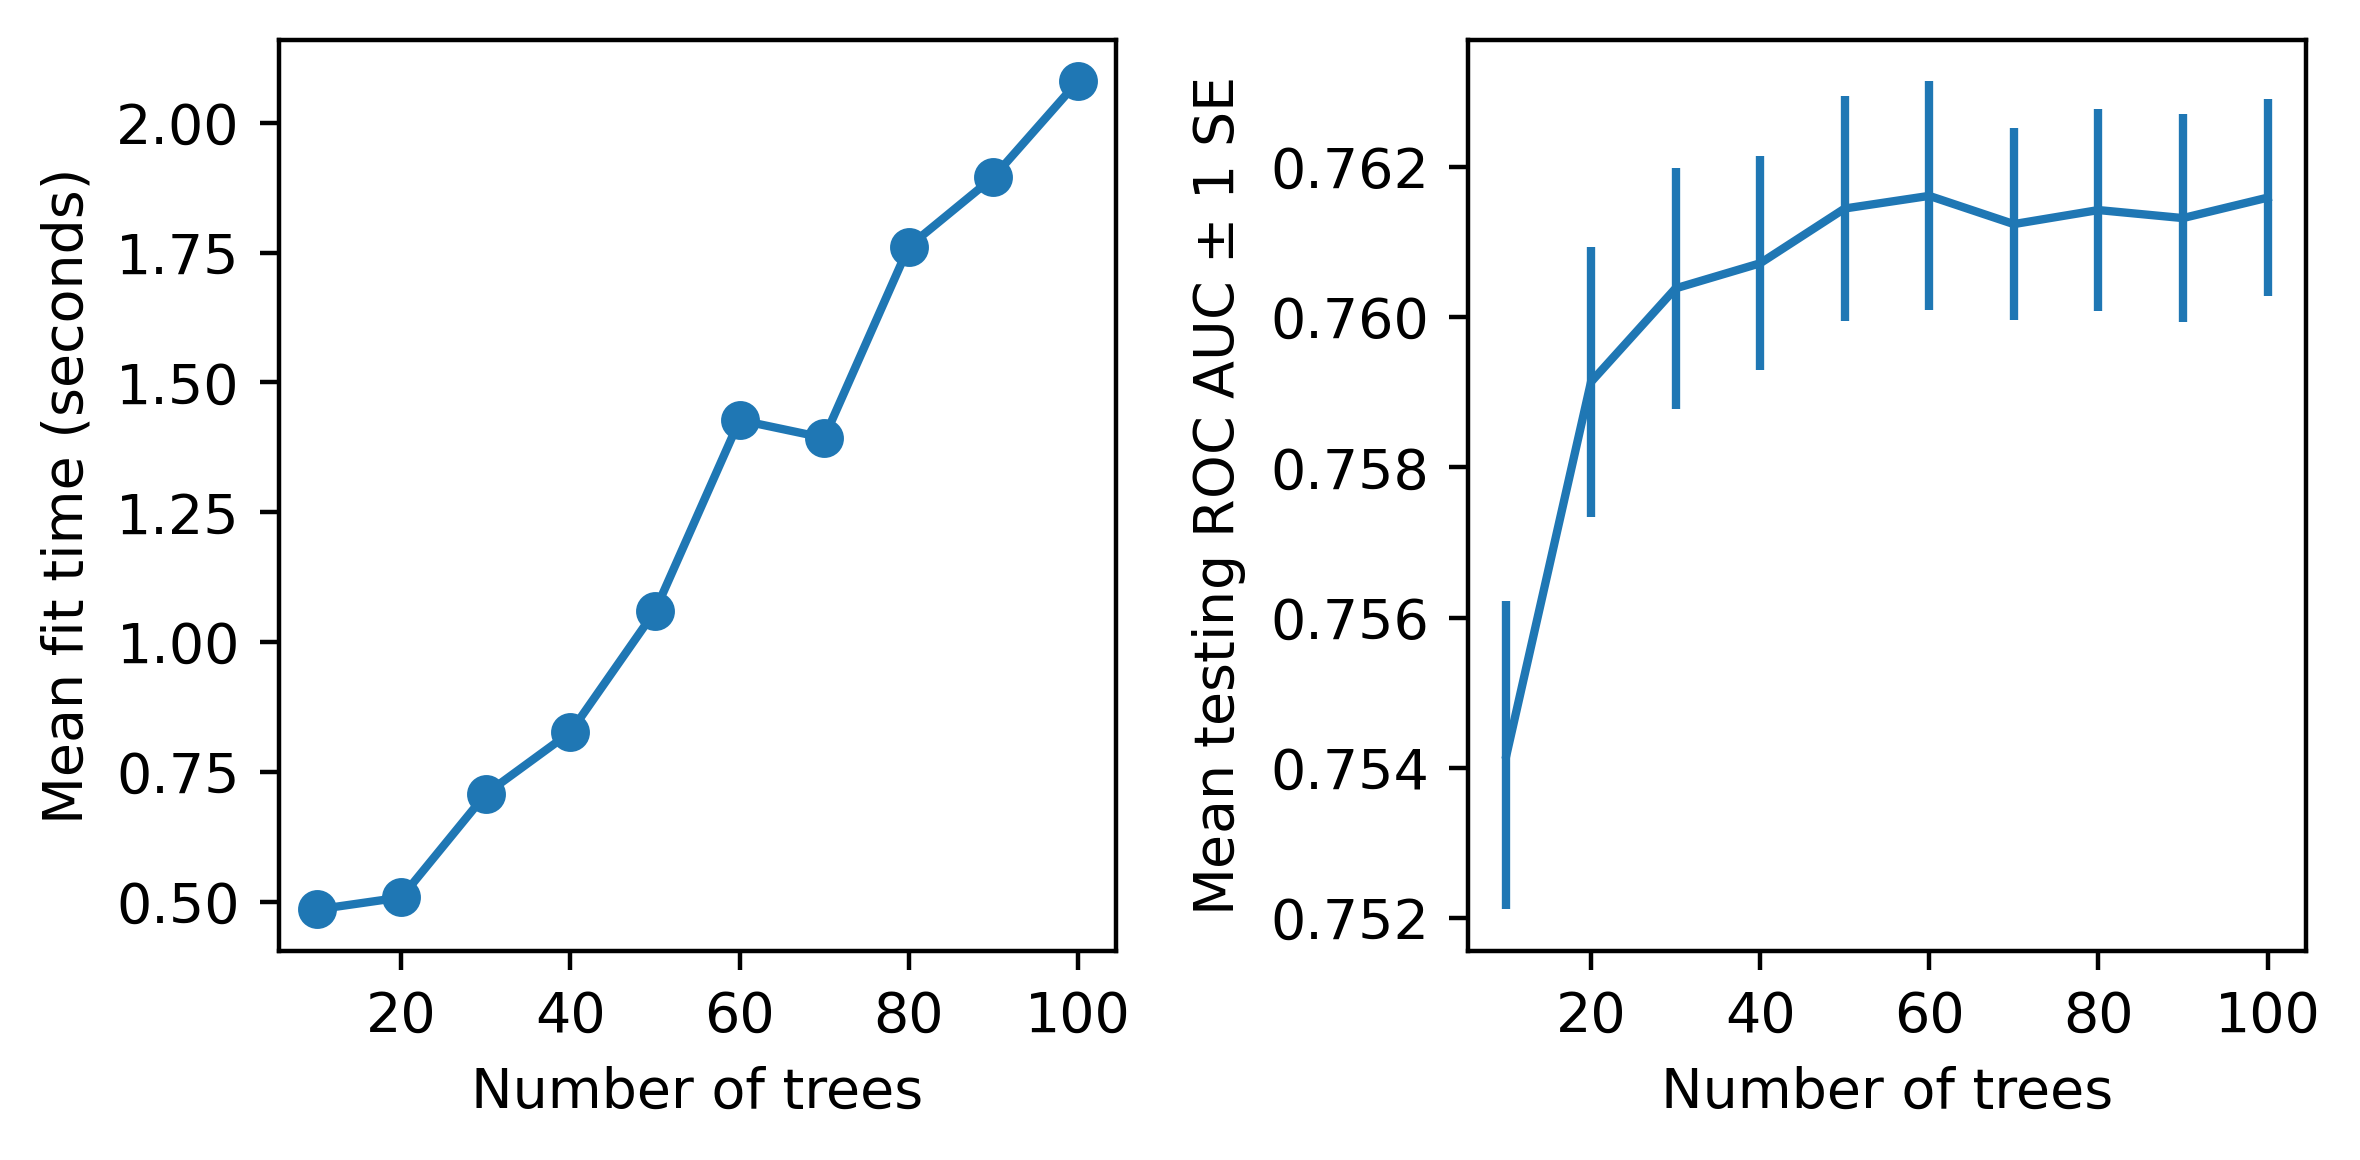

In [17]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()

Bước 7: Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham
số tốt nhất

<Axes: >

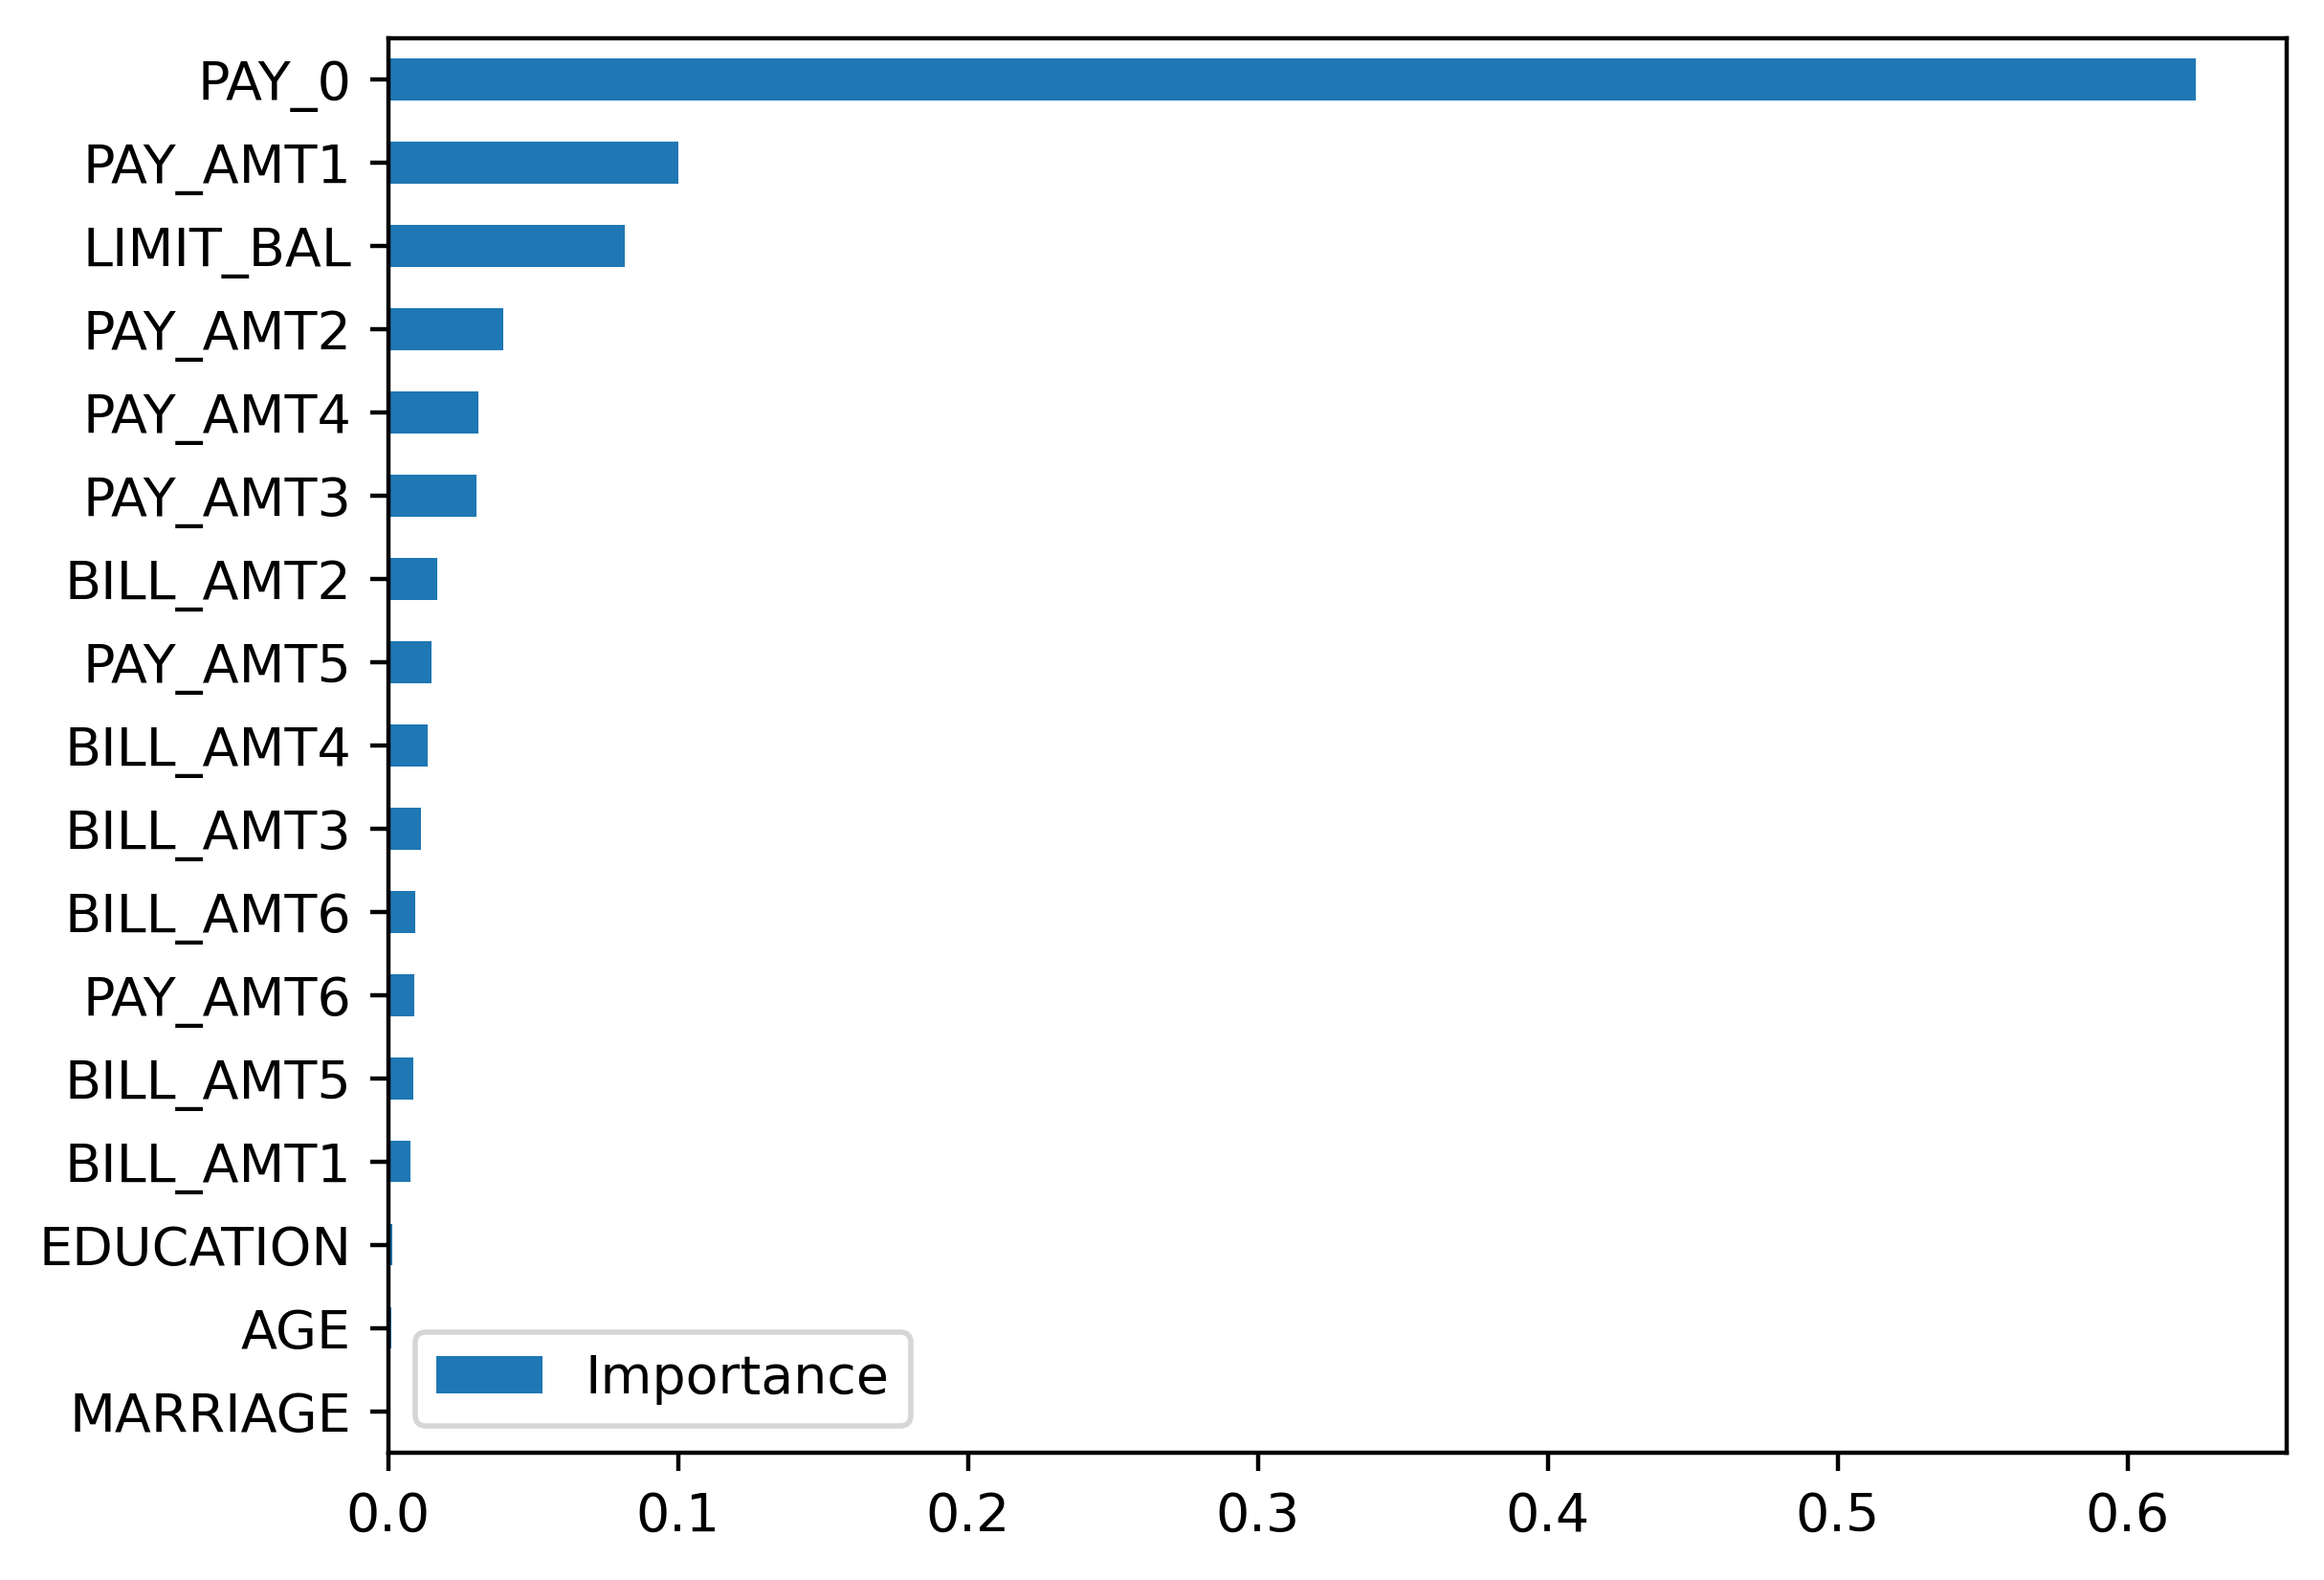

In [18]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()